### Basic markdown

In [ ]:
You can use *bold*, **underline**

### Equations

You can use LaTeX in the Markdown cells:

$${\displaystyle \mathbf {X} =\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}}$$

where $\mathbf {\Sigma }$ is a diagonal matrix with singular values of $\mathbf {X}$

### Symbols

Type slash followed by the name of the symbol you would like to get and press <kbd>Tab</kbd> to obtain it in a code cell (`\alpha` → `α`)

In [1]:
α = 1
α

1

### Plots

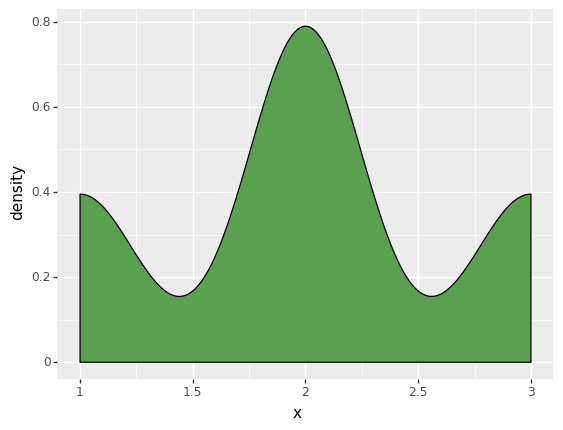

<ggplot: (8752868525764)>

In [2]:
from pandas import DataFrame
from plotnine import ggplot, aes, geom_density

df = DataFrame({'x': [1, 2, 2, 3]})
ggplot(df, aes(x='x')) + geom_density(fill='#59A14F')

### FASTA

JupyterLab [fasta-extension](https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/fasta-extension) provides capabilities of rendering large FASTA sequences:

In [3]:
from pathlib import Path
from widgets_demo import Fasta

data = Path('data/zika_assembled_genomes.fasta').read_text()
Fasta(data)

>EU545988.1|Micronesia|2007-06
------------------------------------------------------------
-----------------------------------------------ATGAAAAACCCCA
AAGAAGAAATCCGGAGGATCCGGATTGTCAATATGCTAAAACGCGGAGTAGCCCGTGTGA
GCCCCTTTGGGGGCTTGAAGAGGCTGCCAGCCGGACTTCTGCTGGGTCATGGGCCCATCA
GGATGGTCTTGGCGATACTAGCCTTTTTGAGATTCACGGCAATCAAGCCATCACTGGGTC
TCATCAATAGATGGGGTTCAGTGGGGAAAAAAGAGGCTATGGAAATAATAAAGAAGTTCA
AGAAAGATCTGGCTGCCATGCTGAGAATAATCAATGCTAGGAAGGAGAAGAAGAGACGAG
GCACAGATACTAGTGTCGGAATTGTTGGCCTCCTGCTGACCACAGCCATGGCAGTGGAGG
TCACTAGACGTGGGAGTGCATACTATATGTACTTGGACAGAAGCGATGCTGGGGAGGCCA
TATCTTTTCCAACCACACTGGGGATGAACAAGTGTTACATACAGATCATGGATCTTGGAC
ACATGTGTGATGCCACCATGAGCTATGAATGCCCTATGTTGGATGAGGGGGTAGAACCAG
ATGACGTCGATTGTTGGTGCAACACGACATCAACTTGGGTTGTGTACGGAACCTGCCACC
ACAAAAAAGGTGAAGCACGGAGATCTAGAAGAGCTGTGACGCTCCCCTCCCATTCCACTA
GGAAGCTGCAAACGCGGTCGCAGACCTGGTTGGAATCAAGAGAATATACAAAGCACCTGA
TTAGAGTCGAAAATTGGATATTCAGGAACCCTGGCTTCGCGTTAGCAGCAGCTGCCATCG
CCTGGCTTTTGGGAAGTTCAACGAGCCAAAAAGTCATATACTTGGTCATGATAC

### Molecular structures

Using [nglview](https://github.com/arose/nglview) - PDB structures (and much more!):

In [4]:
from nglview import show_pdbid

show_pdbid('3pqr')

NGLWidget()

### Imaging data

Using [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets):

In [5]:
import itk
brain = itk.imread('data/005_32months_T2_RegT1_Reg2Atlas_ManualBrainMask_Stripped.nrrd')

In [6]:
from itkwidgets import view
view(brain, background=(255, 255, 255), ui_collapsed=True)

Viewer(background=(255, 255, 255), geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.it…

### Networks and pathways

In [7]:
from ipycytoscape import CytoscapeWidget
from json import loads

tca_cycle = loads(Path('data/hsa00020.cyjs').read_text())
kegg_style = loads(Path('data/kegg-styles.json').read_text())

In [8]:
pathway_plot = CytoscapeWidget()
pathway_plot.graph.add_graph_from_json(tca_cycle['elements'])
pathway_plot.set_style(kegg_style[0]['style'])
pathway_plot.set_layout(name='preset')
pathway_plot

CytoscapeWidget(cytoscape_layout={'name': 'preset'}, cytoscape_style=[{'selector': 'node', 'css': {'border-opa…

In [9]:
from IPython.display import display
from cytoscape_widgets import change_spacing, set_layout
from ipywidgets import IntSlider, Select

spacing_widget = IntSlider(
    value=100,
    description='Spacing'
)
layout_choice_widget = Select(
    options=['cola', 'concentric', 'grid', 'breadthfirst', 'cose'],
    description='Layout'
)

display(layout_choice_widget, spacing_widget)

spacing_widget.observe(change_spacing(pathway_plot))
layout_choice_widget.observe(set_layout(pathway_plot))

Select(description='Layout', options=('cola', 'concentric', 'grid', 'breadthfirst', 'cose'), value='cola')

IntSlider(value=100, description='Spacing')

### Custom widget

A modified example from [Ipywdgets documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html):

In [10]:
from ipywidgets import interactive
from plotnine import ggplot, aes, geom_point, coord_fixed, ylim
from pandas import DataFrame, Series


def func(m, b):
    x = Series(range(-100, 100)) / 10
    df = DataFrame(dict(x=x, y=m * x + b))
    plot = (
        ggplot(df, aes(x='x', y='y'))
        + geom_point()
        + coord_fixed()
        + ylim(-10, 10)
    )
    plot.draw()


interactive_plot = interactive(func, m=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Explaining code details

Whether you want to get help, or explain how a specific fragment of code works without repeating yourself, you can do that with built-in question mark operator.

In this example let's see what are the arguments of `stdev` function, and how it is implemented.

In [3]:
from statistics import stdev

To get help on a function usage prepend or append `?`

In [8]:
stdev?

Signature: stdev(data, xbar=None)
Docstring:
Return the square root of the sample variance.

See ``variance`` for arguments and other details.

>>> stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
1.0810874155219827
File:      ~/.pyenv/versions/3.8.1/lib/python3.8/statistics.py
Type:      function


To get more detailed information use `??`

In [9]:
stdev??

Signature: stdev(data, xbar=None)
Source:   
def stdev(data, xbar=None):
    """Return the square root of the sample variance.

    See ``variance`` for arguments and other details.

    >>> stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
    1.0810874155219827

    """
    var = variance(data, xbar)
    try:
        return var.sqrt()
    except AttributeError:
        return math.sqrt(var)
File:      ~/.pyenv/versions/3.8.1/lib/python3.8/statistics.py
Type:      function


### Multi-lingual - bash example

Use exclamation mark + name of the command you wish to execute:

In [11]:
!pwd

/home/krassowski/notebooks-for-biomedical-research


Create a file with one word *test*:

In [12]:
!echo "test" > test.txt

md5sum is a simple command which you can run on Linux (md5 on Mac) to get a *short* reproducible string which will *very likely* change significantly if the file contents changes.

In [13]:
!md5sum test.txt

d8e8fca2dc0f896fd7cb4cb0031ba249  test.txt


If we change it slightly:

In [14]:
!echo "test2" > test.txt
!md5sum test.txt

126a8a51b9d1bbd07fddc65819a542c3  test.txt


If we revert back:

In [15]:
!echo "test" > test.txt
!md5sum test.txt

d8e8fca2dc0f896fd7cb4cb0031ba249  test.txt


Run the function below after uncommenting the alert function (by removing `//`):

In [16]:
%%js
//alert(1)

<IPython.core.display.Javascript object>

### Multi-lingual - R inside Python

> pip install rpy2

In [17]:
%load_ext rpy2.ipython

In [18]:
from statsmodels import datasets
fertility_wide = datasets.fertility.load_pandas().data

In [19]:
fertility_wide.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.69,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN


In [20]:
assert set(fertility_wide['Indicator Name']) == {'Fertility rate, total (births per woman)'}

In [21]:
fertility_long = (
    fertility_wide
    .set_index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
    .stack()
    .rename_axis(index={None: 'year'})
    .rename('value')
    .reset_index()
)
fertility_long.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.820
1,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,4.655


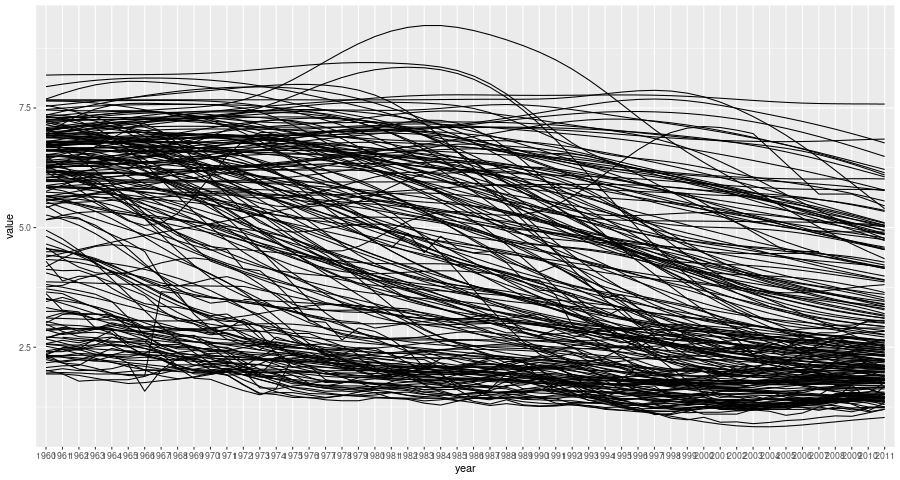

In [22]:
%%R -i fertility_long -w 900
library(ggplot2)

(
    ggplot(fertility_long, aes(x=year, y=value, group=`Country Name`))
    + geom_line()
)